In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [3]:
data=pd.read_csv('train.csv')

In [4]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


##**Data Visualization**

<Axes: xlabel='price_range', ylabel='int_memory'>

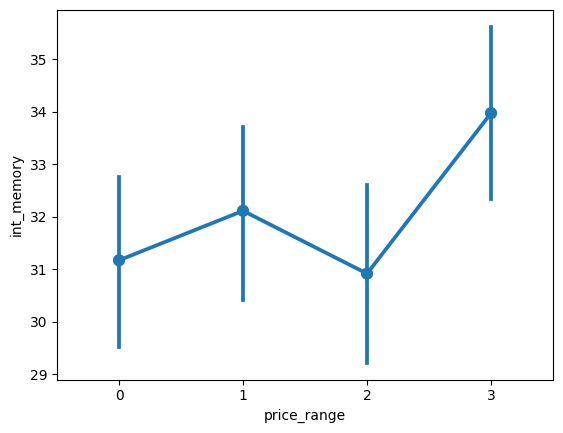

In [25]:
sns.pointplot(y="int_memory", x="price_range", data=data)

<Axes: xlabel='price_range', ylabel='battery_power'>

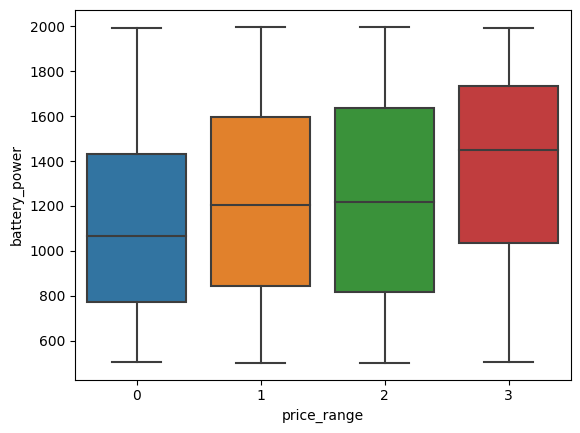

In [26]:
sns.boxplot(x="price_range", y="battery_power", data=data)

## **Classification Problem**

In [6]:
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
x = StandardScaler().fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [7]:
from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression()
lreg.fit(x_train, y_train)
y_pred = lreg.predict(x_test)

In [8]:
accuracy = accuracy_score(y_test, y_pred) * 100
print("Accuracy of the Logistic Regression Model: ",accuracy)

Accuracy of the Logistic Regression Model:  95.5


In [9]:
print(y_pred)

[3 0 2 2 3 0 0 3 3 1 1 3 0 2 3 0 3 2 2 1 0 0 3 1 2 2 3 1 3 1 1 0 2 0 2 3 0
 0 3 3 3 1 3 3 1 3 0 1 3 1 1 3 0 3 0 2 2 2 0 3 3 1 3 2 1 2 3 2 2 2 3 2 1 0
 1 3 2 2 1 2 3 3 3 0 0 0 2 1 2 3 1 2 2 1 0 3 3 3 0 3 1 1 3 1 3 2 2 3 2 3 3
 0 0 1 3 3 0 0 1 0 0 3 2 2 1 2 1 1 0 2 1 3 3 3 3 3 3 2 0 1 1 2 1 3 0 3 0 0
 2 0 1 1 1 1 3 0 0 3 1 3 2 1 3 1 2 3 3 2 1 0 3 1 2 3 3 0 2 2 3 1 2 1 0 1 2
 2 2 0 3 3 1 1 0 2 3 0 1 2 2 0 3 3 3 1 2 3 3 3 0 0 0 2 3 3 0 0 1 3 2 3 3 3
 0 0 2 3 3 1 0 2 0 0 0 3 2 1 2 2 1 1 0 2 3 3 0 0 1 3 3 1 3 0 3 1 1 0 2 3 3
 2 0 0 1 2 3 2 2 3 2 1 0 3 3 2 1 3 2 2 2 1 0 2 2 1 0 0 2 2 2 3 0 1 3 0 2 2
 3 0 2 0 1 1 3 0 0 2 3 1 2 0 2 0 3 0 3 3 2 3 1 2 2 1 1 1 0 1 0 3 1 0 3 0 0
 1 3 0 3 1 1 0 1 3 0 2 1 1 2 1 1 0 2 0 0 3 1 2 3 2 2 0 3 2 2 1 3 2 3 3 3 0
 2 0 3 0 1 1 2 3 1 3 1 2 0 1 2 3 0 0 1 3 0 3 0 2 2 1 1 0 2 0]


## **Training and testing prediction models**

### *Linear Regression, Logistic regression and decision tree classfier models are tested and compared*

#### Decision Tree

In [10]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [11]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [13]:
dtree.score(x_test,y_test)

0.83

#### Linear Regression

In [15]:
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [17]:
lm.score(x_test,y_test)

0.9210479879371704

#### Logistic Regression

In [18]:
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression()

In [20]:
logmodel.score(x_test,y_test)

0.955

##**Logistic regression had the best performance and is used to predict**

In [30]:
y_pred=logmodel.predict(x_test)

In [31]:
print(y_test,y_pred)

[3 0 2 2 2 0 0 3 3 1 1 3 0 2 3 0 3 2 2 1 0 0 3 1 2 2 3 1 3 1 1 0 2 0 1 3 0
 0 3 3 3 1 3 3 1 3 0 1 3 1 1 3 0 3 0 3 2 2 0 3 3 1 3 2 1 2 3 2 2 2 3 2 1 0
 1 3 2 2 1 2 3 3 3 0 0 0 2 1 2 3 1 2 2 1 0 3 3 3 0 3 1 1 2 1 3 2 2 3 2 3 3
 0 0 1 3 3 0 0 1 0 0 3 2 2 1 1 1 1 0 2 1 3 2 3 3 3 3 2 0 1 1 2 1 3 1 3 0 0
 2 0 1 1 1 1 3 0 0 3 1 3 2 1 3 1 2 3 3 2 1 0 3 1 2 3 3 0 2 2 3 0 2 1 0 1 2
 1 2 0 3 3 1 1 0 2 3 0 1 2 2 0 3 3 3 1 2 3 3 3 0 0 0 2 3 3 0 0 1 3 1 3 3 3
 0 0 2 3 3 1 0 2 0 0 0 3 2 0 2 2 1 1 0 2 3 3 0 0 1 3 3 2 3 0 3 1 1 0 2 3 3
 2 0 0 1 2 3 2 2 3 2 1 0 3 3 2 1 3 2 2 2 1 0 2 2 1 0 0 2 2 2 2 0 1 3 0 1 2
 3 0 2 0 1 1 3 0 0 2 3 1 2 0 2 0 3 0 3 3 2 3 1 2 2 1 1 1 0 1 0 3 1 0 3 0 0
 1 3 0 3 1 2 0 1 3 0 2 2 1 2 1 1 0 2 0 0 3 1 2 3 2 2 0 3 2 2 1 3 2 3 3 3 0
 2 0 3 0 1 1 2 2 1 3 1 2 0 1 2 3 0 0 1 3 0 3 0 2 2 1 1 0 2 1] [3 0 2 2 3 0 0 3 3 1 1 3 0 2 3 0 3 2 2 1 0 0 3 1 2 2 3 1 3 1 1 0 2 0 2 3 0
 0 3 3 3 1 3 3 1 3 0 1 3 1 1 3 0 3 0 2 2 2 0 3 3 1 3 2 1 2 3 2 2 2 3 2 1 0
 1 3 2 2 1 2 3 3 3 0 0 0 2 1 2 3 1 2 2

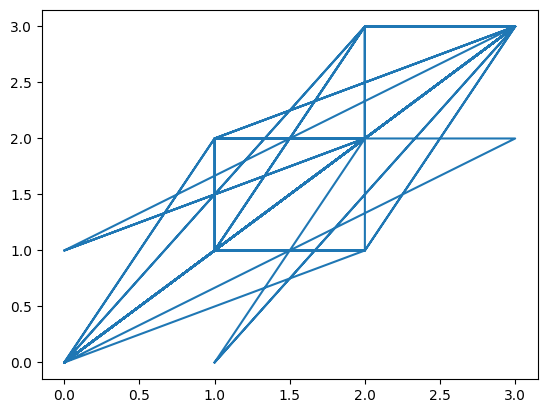

In [32]:
plt.plot(y_test,y_pred)

In [35]:
data_test =pd.read_csv("test.csv").drop('id',axis=1)
data_test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [40]:
predicted_price=lm.predict(data_test.values)

In [41]:
predicted_price

array([4008.37860372, 4391.79816052, 3196.7000849 , 4604.8274245 ,
       2341.14463913, 4121.07712159, 4699.32387239, 2118.66657773,
       4012.08776616, 1141.71465456, 4543.02431429, 4557.80368883,
        989.35820699, 1542.37848844, 3294.48979187, 1244.49888414,
       2851.68460561, 2590.06709069, 4515.60901543, 3005.30877651,
       1910.70407684, 3932.8884861 , 2331.27121004, 2708.1353795 ,
       4515.50825032, 1088.73531422, 3135.02176312,  951.71933496,
       4244.57225817, 1254.8297741 , 3178.73706339, 1404.48894243,
       3860.89628481, 1328.89857628, 1523.51148246, 2159.91398208,
       3976.71645665, 2349.2930291 , 3583.59345694, 2526.47576548,
       1870.0795836 , 3195.33278747, 1056.59395093,  783.31851679,
        973.20655337, 1821.69946595, 1802.09135152, 3494.28985541,
       2290.75580589, 3325.82473254, 2827.30388696, 1212.36979999,
       3515.66343278, 1776.7696725 , 4243.74727952, 1815.94112304,
       4013.33357106, 2092.76942264, 2075.09380359, 4370.57084